In [40]:
file_idn = '1DsX8MXyVJg5OWJn3cWkA-Onx-IaBmzNT'
file_id_train_new = '177Zi7jxlZBFRKUeWOpTMOGjLw5JOinks'
file_id_test_new = '1t0BXk5FQuIZ-m98Tp06cZJZBZTNHOLZz'
file_id_dict = '1XyhjzSuZu3-Rego09BGdwznJcuo-4sBk'

!gdown {file_idn} -O novice.xslx
!gdown {file_id_train_new} -O train.xslx
!gdown {file_id_test_new} -O test.xslx
!gdown {file_id_dict} -O dict.xslx

Downloading...
From: https://drive.google.com/uc?id=1DsX8MXyVJg5OWJn3cWkA-Onx-IaBmzNT
To: /content/novice.xslx
100% 1.80M/1.80M [00:00<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=177Zi7jxlZBFRKUeWOpTMOGjLw5JOinks
To: /content/train.xslx
100% 35.9M/35.9M [00:00<00:00, 59.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t0BXk5FQuIZ-m98Tp06cZJZBZTNHOLZz
To: /content/test.xslx
100% 2.11M/2.11M [00:00<00:00, 15.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XyhjzSuZu3-Rego09BGdwznJcuo-4sBk
To: /content/dict.xslx
100% 40.9k/40.9k [00:00<00:00, 51.4MB/s]


In [42]:
import pandas as pd

data_dct = pd.read_excel('dict.xslx', index_col=0)
df_train = pd.read_excel('train.xslx')
df_test = pd.read_excel('test.xslx')

In [44]:
# DROP DUPLICATES
# Sort by completion date in descending order to keep the latest
df_sorted = df_train.sort_values(by='Completion Date', ascending=False)

# Drop duplicates, keeping the most recent completion date per match
unique_matches_df = df_sorted.drop_duplicates(subset=['Match ID 18Char'], keep='first')

In [48]:
temp = unique_matches_df[['Match ID 18Char','Stage','Closure Reason']]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 31857 to 10925
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Match ID 18Char  3275 non-null   object
 1   Stage            3275 non-null   object
 2   Closure Reason   2489 non-null   object
dtypes: object(3)
memory usage: 102.3+ KB


In [2]:
import pandas as pd

final = pd.read_csv('/content/final_unique_matches_df.csv', index_col=0)
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 0 to 3274
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match ID 18Char                                    3275 non-null   object 
 1   Completion Date                                    3275 non-null   object 
 2   Match Support Contact Notes                        2839 non-null   object 
 3   Stage                                              3275 non-null   object 
 4   Little ID                                          3275 non-null   object 
 5   Big ID                                             3275 non-null   object 
 6   Big County                                         2620 non-null   object 
 7   Big Age                                            3275 non-null   int64  
 8   Big Occupation                                     2950 non-null   object 
 9   Big: Military

In [10]:
emotions = final [['Match ID 18Char','Average Anger','Average Disgust','Average Fear','Average Joy','Average Neutral','Average Sadness','Match Length']]

In [11]:
emotions.describe()


,Average Anger,Average Disgust,Average Fear,Average Joy,Average Neutral,Average Sadness,Match Length
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3275.000000
mean,0.019206,0.005771,0.064005,0.297006,0.388964,0.133884,23.383817
std,0.025883,0.011534,0.078992,0.157655,0.142368,0.120496,19.704251
min,0.001285,0.000508,0.000300,0.001503,0.003404,0.001672,0.000000
25%,0.009369,0.002956,0.014627,0.193058,0.298542,0.051107,9.100000
50%,0.012242,0.003960,0.039508,0.286573,0.391861,0.099631,16.800000
75%,0.017963,0.006087,0.085043,0.385180,0.481323,0.177896,32.200000
max,0.368513,0.537776,0.930411,0.980775,0.926360,0.950369,97.200000


In [12]:
df = emotions.copy()

In [21]:
sad_threshold = df['Average Sadness'].mean() + df['Average Sadness'].std()
df['High Sadness'] = df['Average Sadness'] > sad_threshold


                   mean  median  count
High Sadness                          
False         25.223085    18.6   2846
True          11.182051     8.6    429


<ipython-input-22-f7a46cb48085>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='High Sadness', y='Match Length', palette='coolwarm')


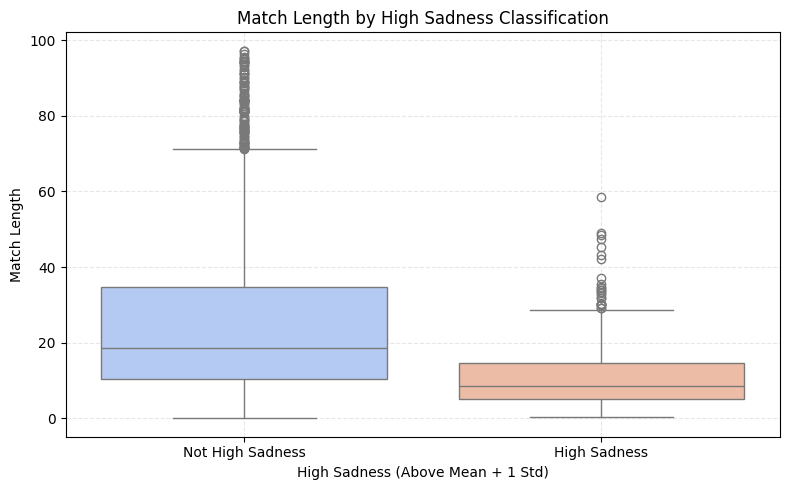

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with emotion scores
sad_mean = df['Average Sadness'].mean()
sad_std = df['Average Sadness'].std()
sad_threshold = sad_mean + sad_std

# Label High Sadness matches
df['High Sadness'] = df['Average Sadness'] > sad_threshold

# Basic stats
grouped = df.groupby('High Sadness')['Match Length'].agg(['mean', 'median', 'count'])
print(grouped)

# Boxplot or violin plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='High Sadness', y='Match Length', palette='coolwarm')
plt.title('Match Length by High Sadness Classification')
plt.xlabel('High Sadness (Above Mean + 1 Std)')
plt.ylabel('Match Length')
plt.xticks([0, 1], ['Not High Sadness', 'High Sadness'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-37-6e18253c3339>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='High Sadness', y='Match Length', palette='viridis')


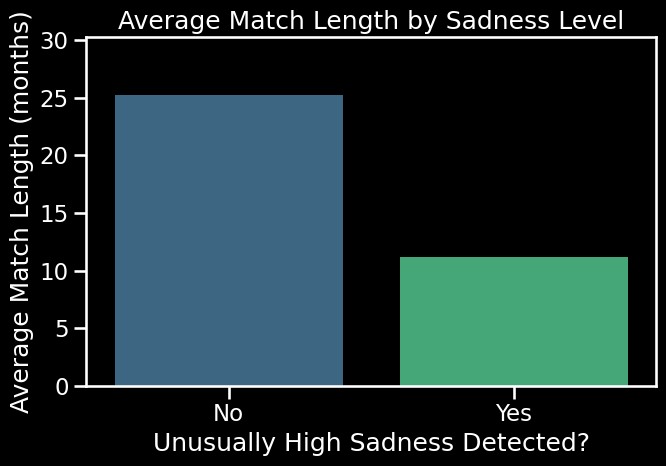

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
sns.set_context('talk')

# Bar plot of mean match lengths
means = df.groupby('High Sadness')['Match Length'].mean().reset_index()
means['High Sadness'] = means['High Sadness'].map({True: 'Yes', False: 'No'})

plt.figure(figsize=(7, 5))
sns.barplot(data=means, x='High Sadness', y='Match Length', palette='viridis')
plt.xlabel('Unusually High Sadness Detected?')
plt.title('Average Match Length by Sadness Level')
plt.ylabel('Average Match Length (months)')
plt.ylim(0, means['Match Length'].max() + 5)
plt.tight_layout()
plt.show()


In [4]:
success = pd.read_csv('/content/success_match.csv', index_col=0)
success.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 39332 to 37586
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match ID 18Char   3275 non-null   object
 1   Successful Match  3275 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 54.4+ KB


In [56]:
df = df.merge(success, on='Match ID 18Char', how='left')

In [5]:
final = final.merge(success, on='Match ID 18Char', how='left')

In [50]:
def is_successful_match(row):
    # Condition 1: remains active
    cond_active = (row['Stage'] == 'Active')

    # Condition 2: lasts a long time (Adjustable)
    cond_long = (row['Match Length'] >= df['Match Length'].median())

    # Condition 3: closes due to the age of Little
    cond_age = row['Closure Reason'] == 'Child: Graduated'

    # Condition 4: "Successful Match Closure" in Closure Reason
    cond_success_closure = row['Closure Reason'] == 'Successful Match Closure'

    return cond_active or cond_long or cond_age or cond_success_closure
df['Successful Match'] = df.apply(is_successful_match, axis=1)

In [6]:
final['Successful Match'].value_counts()

,count
Successful Match,
False,1882
True,1393


In [9]:
final.groupby('Successful Match')['Introverted val'].mean()

,Introverted val
Successful Match,
False,0.032012
True,0.026564


In [10]:
final.groupby('Successful Match')['Extroverted val'].mean()

,Extroverted val
Successful Match,
False,0.055628
True,0.056044


In [12]:
final['Extroverted - Introverted'] = abs(final['Extroverted - Introverted'] )
final.groupby('Successful Match')['Extroverted - Introverted'].mean()

,Extroverted - Introverted
Successful Match,
False,0.067371
True,0.051379


In [59]:
df.groupby('Successful Match')['Average Sadness'].mean()

,Average Sadness
Successful Match,
False,0.165914
True,0.090862


In [60]:
df.groupby('Successful Match')['Average Joy'].mean()

,Average Joy
Successful Match,
False,0.272702
True,0.329650


In [61]:
df.groupby('Successful Match')['Average Neutral'].mean()

,Average Neutral
Successful Match,
False,0.379094
True,0.402221


In [ ]:
agg_df = outlier.groupby([‘is_outlier’, ‘< 6 months till Closure?’]).size().reset_index(name=‘count’)
plt.style.use(‘dark_background’)
# Plot
agg_df['is_outlier'] = agg_df['is_outlier'].map({True: 'True', False: 'False'})
sns.barplot(x=‘is_outlier’, y=‘count’, hue=‘< 6 months till Closure?’, palette=‘viridis’, data=agg_df)
plt.xlabel(‘< 6 months till closure?’)
plt.ylabel(‘Number of Calls’)
plt.gca().set_xticklabels(' ’)
plt.title(‘Calls Made Out of Cadence and Closure Proximity’)
plt.legend(title=' ’)
plt.show()

                   mean  median  count
High Disgust                          
False         23.633951    17.0   3184
True          14.631868    11.1     91


<ipython-input-16-94e76b734116>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='High Disgust', y='Match Length', palette='coolwarm')


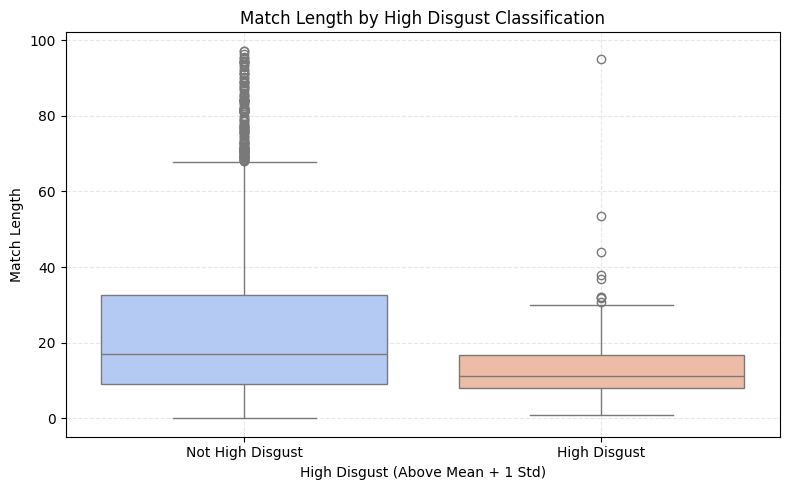

In [16]:
sad_threshold = df['Average Disgust'].mean() + df['Average Disgust'].std()
df['High Disgust'] = df['Average Disgust'] > sad_threshold

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with emotion scores
sad_mean = df['Average Disgust'].mean()
sad_std = df['Average Disgust'].std()
sad_threshold = sad_mean + sad_std

# Label High Sadness matches
df['High Disgust'] = df['Average Disgust'] > sad_threshold

# Basic stats
grouped = df.groupby('High Disgust')['Match Length'].agg(['mean', 'median', 'count'])
print(grouped)

# Boxplot or violin plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='High Disgust', y='Match Length', palette='coolwarm')
plt.title('Match Length by High Disgust Classification')
plt.xlabel('High Disgust (Above Mean + 1 Std)')
plt.ylabel('Match Length')
plt.xticks([0, 1], ['Not High Disgust', 'High Disgust'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



                 mean  median  count
High Anger                          
False       23.768991    17.1   3054
True        18.061086    14.5    221


<ipython-input-17-8693f0846f8e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='High Anger', y='Match Length', palette='coolwarm')


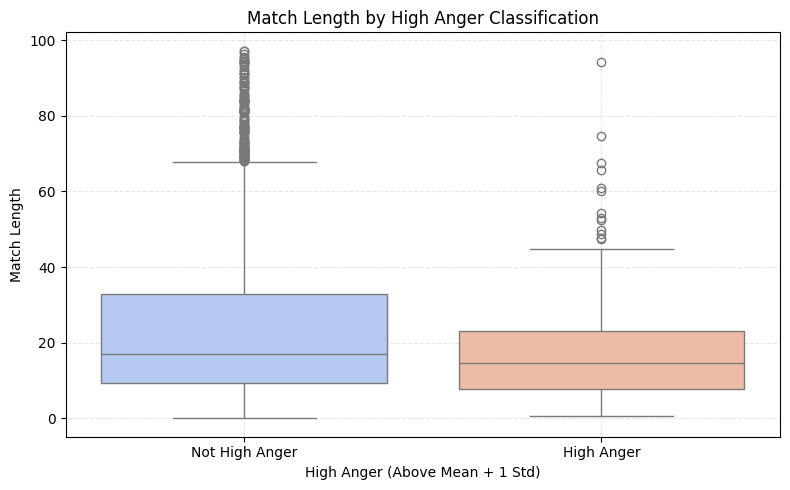

In [17]:
#'Average Anger','Average Disgust','Average Fear','Average Joy','Average Neutral'

sad_threshold = df['Average Anger'].mean() + df['Average Anger'].std()
df['High Anger'] = df['Average Anger'] > sad_threshold

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with emotion scores
sad_mean = df['Average Anger'].mean()
sad_std = df['Average Anger'].std()
sad_threshold = sad_mean + sad_std

# Label High Sadness matches
df['High Anger'] = df['Average Anger'] > sad_threshold

# Basic stats
grouped = df.groupby('High Anger')['Match Length'].agg(['mean', 'median', 'count'])
print(grouped)

# Boxplot or violin plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='High Anger', y='Match Length', palette='coolwarm')
plt.title('Match Length by High Anger Classification')
plt.xlabel('High Anger (Above Mean + 1 Std)')
plt.ylabel('Match Length')
plt.xticks([0, 1], ['Not High Anger', 'High Anger'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



                mean  median  count
High Fear                          
False      24.092962    17.6   2927
True       17.419253    12.2    348


<ipython-input-18-f2ccc8f0f246>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='High Fear', y='Match Length', palette='coolwarm')


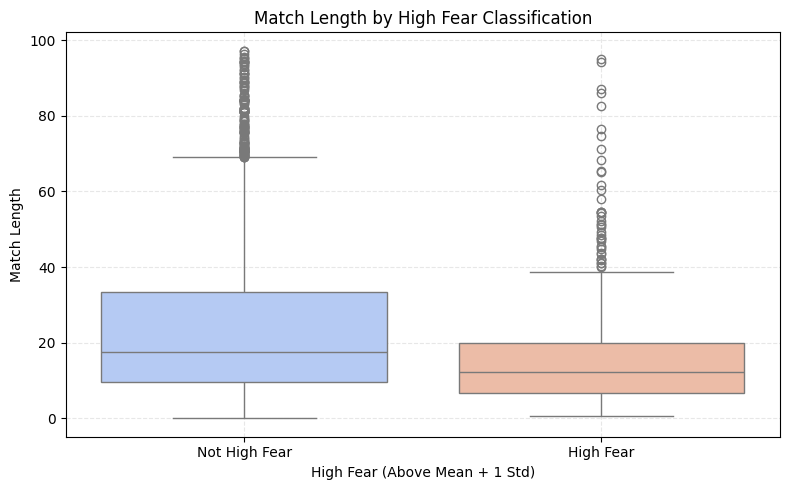

In [18]:
#'Average Anger','Average Disgust','Average Fear','Average Joy','Average Neutral'

sad_threshold = df['Average Fear'].mean() + df['Average Fear'].std()
df['High Fear'] = df['Average Fear'] > sad_threshold

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with emotion scores
sad_mean = df['Average Fear'].mean()
sad_std = df['Average Fear'].std()
sad_threshold = sad_mean + sad_std

# Label High Sadness matches
df['High Fear'] = df['Average Fear'] > sad_threshold

# Basic stats
grouped = df.groupby('High Fear')['Match Length'].agg(['mean', 'median', 'count'])
print(grouped)

# Boxplot or violin plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='High Fear', y='Match Length', palette='coolwarm')
plt.title('Match Length by High Fear Classification')
plt.xlabel('High Fear (Above Mean + 1 Std)')
plt.ylabel('Match Length')
plt.xticks([0, 1], ['Not High Fear', 'High Fear'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



               mean  median  count
High Joy                          
False     24.219319   17.50   2821
True      18.192291   12.95    454


<ipython-input-19-dcfb7c8fefb1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='High Joy', y='Match Length', palette='coolwarm')


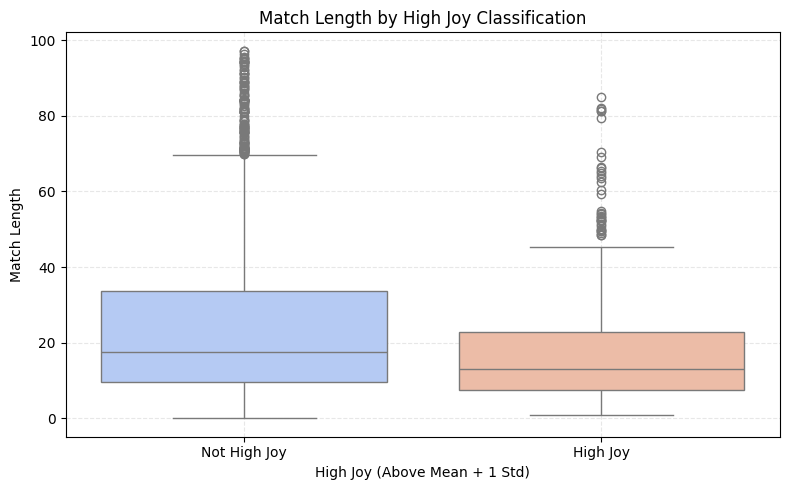

In [19]:
#'Average Anger','Average Disgust','Average Fear','Average Joy','Average Neutral'

sad_threshold = df['Average Joy'].mean() + df['Average Joy'].std()
df['High Joy'] = df['Average Joy'] > sad_threshold

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with emotion scores
sad_mean = df['Average Joy'].mean()
sad_std = df['Average Joy'].std()
sad_threshold = sad_mean + sad_std

# Label High Sadness matches
df['High Joy'] = df['Average Joy'] > sad_threshold

# Basic stats
grouped = df.groupby('High Joy')['Match Length'].agg(['mean', 'median', 'count'])
print(grouped)

# Boxplot or violin plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='High Joy', y='Match Length', palette='coolwarm')
plt.title('Match Length by High Joy Classification')
plt.xlabel('High Joy (Above Mean + 1 Std)')
plt.ylabel('Match Length')
plt.xticks([0, 1], ['Not High Joy', 'High Joy'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



                   mean  median  count
High Neutral                          
False         23.992530    17.2   2798
True          19.813208    14.9    477


<ipython-input-20-26b46ae2c792>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='High Neutral', y='Match Length', palette='coolwarm')


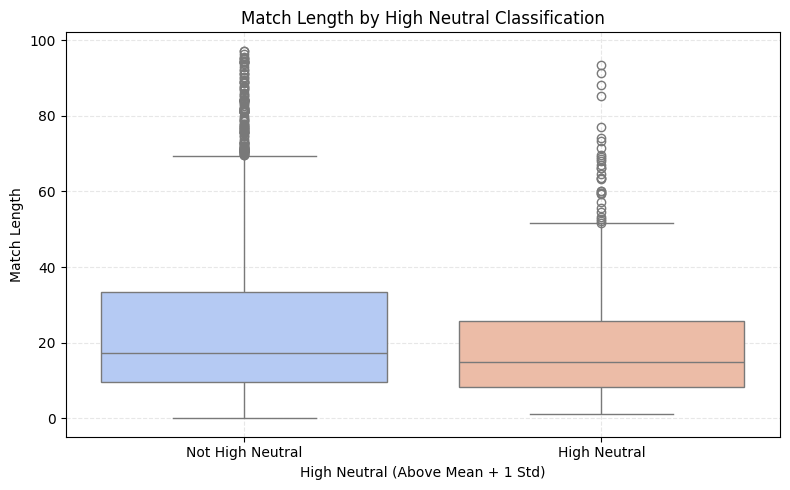

In [20]:
#'Average Anger','Average Disgust','Average Fear','Average Joy','Average Neutral'

sad_threshold = df['Average Neutral'].mean() + df['Average Neutral'].std()
df['High Neutral'] = df['Average Neutral'] > sad_threshold

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with emotion scores
sad_mean = df['Average Neutral'].mean()
sad_std = df['Average Neutral'].std()
sad_threshold = sad_mean + sad_std

# Label High Sadness matches
df['High Neutral'] = df['Average Neutral'] > sad_threshold

# Basic stats
grouped = df.groupby('High Neutral')['Match Length'].agg(['mean', 'median', 'count'])
print(grouped)

# Boxplot or violin plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='High Neutral', y='Match Length', palette='coolwarm')
plt.title('Match Length by High Neutral Classification')
plt.xlabel('High Neutral (Above Mean + 1 Std)')
plt.ylabel('Match Length')
plt.xticks([0, 1], ['Not High Neutral', 'High Neutral'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



In [35]:
full_df = pd.read_csv('/content/all_emotions_train.csv', index_col=0)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39345 entries, a1v2J0000028pRvQAI to a1vUX000001UAe5YAG
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Completion Date              39198 non-null  object 
 1   Match Support Contact Notes  37891 non-null  object 
 2   word_count                   39345 non-null  int64  
 3   anger                        37891 non-null  float64
 4   disgust                      37891 non-null  float64
 5   fear                         37891 non-null  float64
 6   joy                          37891 non-null  float64
 7   neutral                      37891 non-null  float64
 8   sadness                      37891 non-null  float64
 9   surprise                     37891 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.3+ MB


In [36]:
top_sad = full_df.sort_values(by='sadness', ascending=False)
top_sad[['sadness', 'Match Support Contact Notes']].head(20).to_csv("top_saddest_contacts.csv")
